> # 원본코드

In [ ]:
import speech_recognition as sr
#import sys #-- 텍스트 저장 시 사용
r = sr.Recognizer()
with sr.Microphone() as source:
    print("말씀하세요.")
    speech = r.listen(source)
#sys.stdout = open("audio_output.txt", "w") #-- 텍스트 저장 시 사용
try:
    audio = r.recognize_google(speech, language="ko-KR")
    print("<음성인식 결과>\n " + audio)       
except sr.UnknownValueError:
    print("Your speech can not understand")
except sr.RequestError as e:
    print("Request Error!; {0}".format(e))
except KeyboardInterrupt:
    pass
#sys.stdout.close() #-- 텍스트 저장 시 사용


> # 응용코드

### 마이크를 통하여 '직진','후진' 등을 인식하면 SerBot이 주행하는 코드 추가

In [ ]:
import speech_recognition as sr
from pop import Pilot

r = sr.Recognizer()
bot = Pilot.SerBot()

speed = 30

while True:
    with sr.Microphone() as source:
        print("말씀하세요.")
        speech = r.listen(source)

    try:
        audio = r.recognize_google(speech, language="ko-KR")
        print("<음성인식 결과>\n " + audio)
        if audio == '직진':
            bot.setSpeed(speed)
            bot.forward()
        elif audio == '후진':
            bot.setSpeed(speed)
            bot.backward()
        elif audio == '좌회전':
            bot.move(270, speed)
        elif audio == '우회전':
            bot.move(90, speed)
        elif audio == '빠르게':
            speed = speed + 10
            bot.forward()
        elif audio == '느리게':
            speed = speed - 10
            bot.forward()

    except sr.UnknownValueError:
        print("Your speech can not understand")
    except sr.RequestError as e:
        print("Request Error!; {0}".format(e))
    except KeyboardInterrupt:
        break


> # gTTS를 통하여 오디오 파일 생성

In [ ]:
from gtts import gTTS

tts = gTTS(text='다시 말씀해주세요', lang='ko')
tts.save('re.wav')

> # playsound 라이브러리를 이용하여 오디오 파일 재생

In [ ]:
import speech_recognition as sr
from pop import Pilot

r = sr.Recognizer()
bot = Pilot.SerBot()

speed = 30

while True:
    with sr.Microphone() as source:
        print("말씀하세요.")
        speech = r.listen(source)

    try:
        audio = r.recognize_google(speech, language="ko-KR")
        print("<음성인식 결과>\n " + audio)
        if audio == '직진':
            bot.setSpeed(speed)
            bot.forward()
            playsound("forward.wav")
        elif audio == '후진':
            bot.setSpeed(speed)
            bot.backward()
            playsound("backward.wav")
        elif audio == '좌회전':
            bot.move(270, speed)
            playsound("left.wav")
        elif audio == '우회전':
            bot.move(90, speed)
            playsound("right.wav")
        elif audio == '빠르게':
            playsound("faster.wav")
            speed = speed + 10
            bot.forward()
        elif audio == '느리게':
            playsound("slower.wav")
            speed = speed - 10
            bot.forward()

    except sr.UnknownValueError:
        print("Your speech can not understand")
    except sr.RequestError as e:
        print("Request Error!; {0}".format(e))
    except KeyboardInterrupt:
        break


> # listen 함수의 듣는 시간 설정

### - 말을 하고 인식된 말을 처리하는데 시간이 너무 오래 걸림
### - phrase_time_limit = 3 으로 설정하면 한 번 실행될 때 3초에 한번 판단

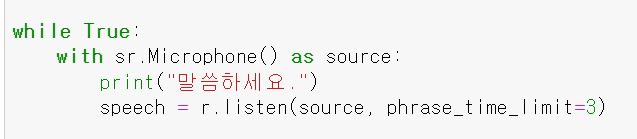

In [ ]:
import speech_recognition as sr
from pop import Pilot

r = sr.Recognizer()
bot = Pilot.SerBot()

speed = 30

while True:
    with sr.Microphone() as source:
        print("말씀하세요.")
        speech = r.listen(source, phrase_time_limit=3)

    try:
        audio = r.recognize_google(speech, language="ko-KR")
        print("<음성인식 결과>\n " + audio)
        if audio == '직진':
            bot.setSpeed(speed)
            bot.forward()
            playsound("forward.wav")
        elif audio == '후진':
            bot.setSpeed(speed)
            bot.backward()
            playsound("backward.wav")
        elif audio == '좌회전':
            bot.move(270, speed)
            playsound("left.wav")
        elif audio == '우회전':
            bot.move(90, speed)
            playsound("right.wav")
        elif audio == '빠르게':
            playsound("faster.wav")
            speed = speed + 10
            bot.forward()
        elif audio == '느리게':
            playsound("slower.wav")
            speed = speed - 10
            bot.forward()

    except sr.UnknownValueError:
        print("Your speech can not understand")
    except sr.RequestError as e:
        print("Request Error!; {0}".format(e))
    except KeyboardInterrupt:
        break


> # 미인식시 정지

### - count 변수를 추가하여 3번 이상 인식되는 말이 없을 시 정지

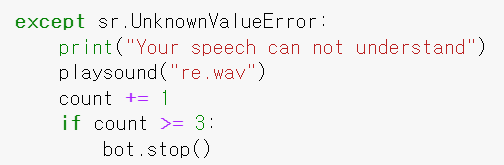

### - 인식되면 count 초기화

In [ ]:
import speech_recognition as sr
from pop import Pilot

r = sr.Recognizer()
bot = Pilot.SerBot()

speed = 30
count = 0

while True:
    with sr.Microphone() as source:
        print("말씀하세요.")
        speech = r.listen(source, phrase_time_limit=3)

    try:
        audio = r.recognize_google(speech, language="ko-KR")
        print("<음성인식 결과>\n " + audio)
        if audio == '직진':
            bot.setSpeed(speed)
            bot.forward()
            playsound("forward.wav")
        elif audio == '후진':
            bot.setSpeed(speed)
            bot.backward()
            playsound("backward.wav")
        elif audio == '좌회전':
            bot.move(270, speed)
            playsound("left.wav")
        elif audio == '우회전':
            bot.move(90, speed)
            playsound("right.wav")
        elif audio == '빠르게':
            playsound("faster.wav")
            speed = speed + 10
            bot.forward()
        elif audio == '느리게':
            playsound("slower.wav")
            speed = speed - 10
            bot.forward()
            
        count = 0

    except sr.UnknownValueError:
        print("Your speech can not understand")
        playsound("re.wav")
        count += 1
        if count >= 3:
            bot.stop()
    except sr.RequestError as e:
        print("Request Error!; {0}".format(e))
    except KeyboardInterrupt:
        break


> # 최종코드

### - 인식 정확도 매우 높지 않음
### - 특정 단어가 포함되어 있을 시 특정 주행

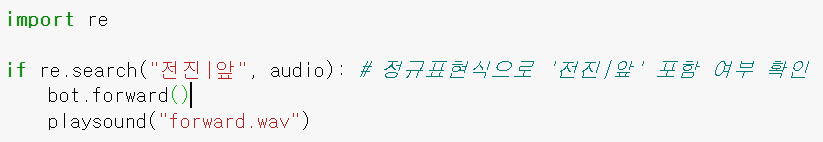

In [ ]:
import speech_recognition as sr
from pop import Pilot
import re
from playsound import playsound

r = sr.Recognizer()
bot = Pilot.SerBot()

speed = 30
bot.setSpeed(speed)

count = 0

while True:
    with sr.Microphone() as source:
        print("말씀하세요.")
        speech = r.listen(source, phrase_time_limit=3)

    try:
        audio = r.recognize_google(speech, language="ko-KR")
        print("<음성인식 결과>\n " + audio)
        if re.search("전진|앞", audio): # 정규표현식으로 'ㅈㅈ' 포함 여부 확인
            bot.forward()
            playsound("forward.wav")
        elif re.search("후진|뒤", audio):
            bot.backward()
            playsound("backward.wav")
        elif re.search("좌|왼", audio):
            bot.move(270, speed)
            playsound("left.wav")
        elif re.search("우|오", audio):
            bot.move(90, speed)
            playsound("right.wav")
        elif re.search("빠르|빨", audio):
            playsound("faster.wav")
            speed = 60
            bot.setSpeed(speed)
            bot.forward()
        elif re.search("느리|천천", audio):
            playsound("slower.wav")
            speed = 30
            bot.setSpeed(speed)
            bot.forward()
        elif re.search("멈|스탑", audio):
            playsound("stop.wav")
            bot.stop()

        count = 0

    except sr.UnknownValueError:
        #bot.stop()
        print("Your speech can not understand")
        playsound("re.wav")
        count += 1
        if count >= 3:
            #playsound("stop.wav")
            bot.stop()
    except sr.RequestError as e:
        print("Request Error!; {0}".format(e))
    except KeyboardInterrupt:
        break
